In [1]:
# Importação das biblíotecas relevantes para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# Cria lista na mão dos códigos UF e os UFs
uf_number_code = pd.DataFrame({"uf_code":["11", "12", "13", "14", "15", "16", "17", "21", "22", "23", "24", "25", "26", "27",
                                          "28", "29", "31", "32", "33", "35", "41", "42", "43", "50", "51", "52", "53"],
                               "uf":["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL",
                                       "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"]})

In [10]:
# URL do arquivo CSV
filePath = 'https://raw.githubusercontent.com/fdrigui/BootcampDataScience/main/module_one/dados/A225356189_28_143_208(atend).csv'

# Abre arquivo
df_atend = pd.read_csv(filePath, sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=12, na_values='-')
df_atend.columns = df_atend.columns.str.replace('/', '-')
df_atend = df_atend.rename(columns={'Unidade da Federação':'uf_code_and_name'})
df_atend[['uf_code', 'uf_name']] = df_atend['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
df_atend = df_atend.dropna(axis=1, how='any')
df_atend['uf'] = df_atend['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
df_atend['uf_i'] = df_atend['uf']
df_atend = df_atend.set_index('uf_i')
df_atend['2008-Jan'] = df_atend['2008-Fev']
df_atend_t = df_atend.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf', 'uf_name'], axis=1).T.loc['2008-Jan':'2019-Dez', :].copy()
df_atend_t[['ano', 'mes']] = df_atend_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})

[]

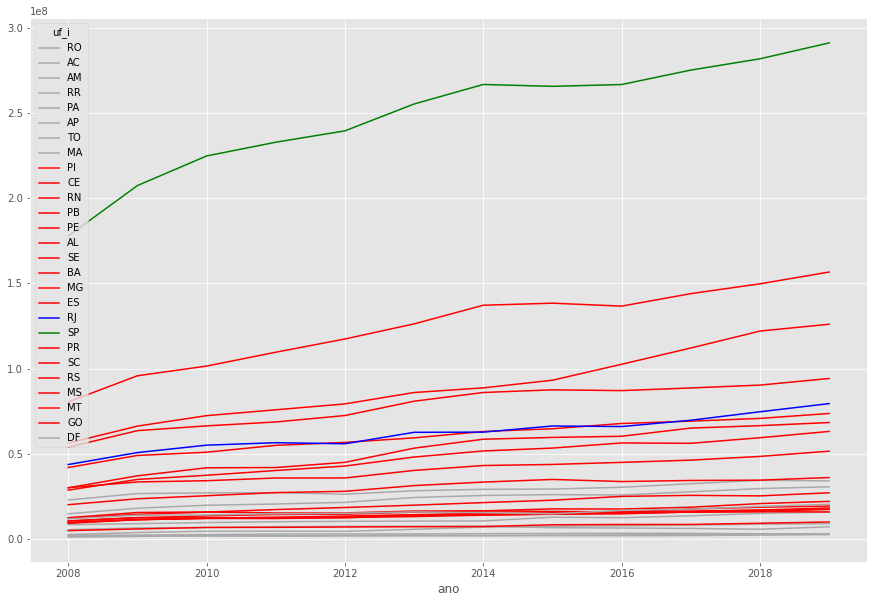

In [29]:
df_atend_t.groupby('ano').mean().plot(figsize=(15,10), color=['darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','r','r','r','r','r','r','r','r','r','r','b','g','r','r','r','r','r','r',])
plt.plot()

In [33]:
df_atend_t.columns

ValueError: ('Shapes must match', (29,), (1,))